In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
from keras.utils import np_utils

In [6]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

In [31]:
model = Sequential()

In [32]:
model.add(Flatten(input_shape=(28, 28)))

In [33]:
model.add(Dense(20, activation='relu'))

In [34]:
model.add(Dense(80, activation='relu'))

In [35]:
model.add(Dense(100, activation='relu'))

In [36]:
model.add(Dense(160, activation='relu'))

In [37]:
model.add(Dense(10, activation='softmax'))

In [38]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [39]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0897 - acc: 0.1266
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0879 - acc: 0.1683
Epoch 3/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0826 - acc: 0.2974
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0763 - acc: 0.4066
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0554 - acc: 0.6676
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0306 - acc: 0.8098
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0227 - acc: 0.8554
Epoch 8/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0192 - acc: 0.8770
Epoch 9/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0173 - acc: 0.8898
Epoch 10/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0159 - acc: 0.8981

In [40]:
y_train[33]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [19]:
y_test[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Step 3 預測

In [41]:
from ipywidgets import interact_manual

In [45]:
model.predict(np.array([x_test[87]]))

array([[1.6168026e-03, 1.6691716e-06, 5.3942578e-05, 5.1772338e-01,
        1.1549225e-05, 4.7707602e-01, 1.9652396e-04, 1.6757358e-05,
        3.2577503e-03, 4.5592205e-05]], dtype=float32)

In [46]:
model.predict_classes(np.array([x_test[87]]))

array([3])

In [47]:
predict = model.predict_classes(x_test)

In [48]:
predict

array([7, 2, 1, ..., 4, 5, 6])

In [49]:
def test(測試編號):
    plt.imshow(x_test[測試編號], cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

神經網路判斷為: 8


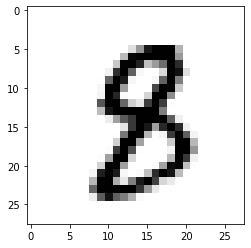

In [53]:
test(1287)

In [54]:
interact_manual(test, 測試編號=(0, 9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [55]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 29us/step


In [56]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.010650041323184268
正確率 0.9312
